In [55]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import seaborn as sns

import re

In [56]:
def extract_text_from_rs(input_ResultSet, output_lst):
    '''Takes a ResultSet object from bs4 and extracts the text of each element into a list.
    Expects a ResultSet item and an empty list for the parameters.'''
    for el in input_ResultSet:
        text = el.get_text()
        text = re.sub('\W', '', text)
        output_lst.append(text)

In [57]:
imdb_top_movies = 'https://www.imdb.com/chart/top?ref_=nv_mv_250'
page = requests.get(imdb_top_movies)
soup = BeautifulSoup(page.content, 'html.parser')

In [58]:
years = soup.find_all(class_='secondaryInfo')
years_list = []

extract_text_from_rs(years, years_list)

In [59]:
years_list[0:5]

['1994', '1972', '1974', '2008', '1957']

In [60]:
ratings = soup.find_all(class_='ratingColumn imdbRating')
ratings_list = []

extract_text_from_rs(ratings, ratings_list)

In [61]:
ratings_list[0:5]

['92', '92', '90', '90', '89']

In [62]:
titles = soup.find_all(class_='titleColumn')
title_children = []

for tl in titles:
    child = tl.findChildren('a', recursive=False)
    for cl in child:
        child_text = cl.get_text()
        title_children.append(child_text)

In [63]:
title_children[0:5]

['The Shawshank Redemption',
 'The Godfather',
 'The Godfather: Part II',
 'The Dark Knight',
 '12 Angry Men']

In [64]:
imdb_df = pd.DataFrame({
    'years':years_list,
    'rating':ratings_list,
    'title':title_children
})

In [69]:
imdb_df.head()

,years,rating,title,decade
0,1994,92,The Shawshank Redemption,199
1,1972,92,The Godfather,197
2,1974,90,The Godfather: Part II,197
3,2008,90,The Dark Knight,200
4,1957,89,12 Angry Men,195


In [66]:
imdb_df['decade'] = (imdb_df['years'].astype('int'))/10

In [68]:
#by returning the ['decade'] column to an int type, it replaces the last digit with a 0.
imdb_df['decade'] = imdb_df['decade'].astype('int')

In [70]:
imdb_df['decade'] = imdb_df['decade'].astype('str')+'0'

In [71]:
imdb_df['rating'] = imdb_df['rating'].astype('int')

In [72]:
imdb_df['ranking'] = list(range(250))
imdb_df['ranking'] = imdb_df['ranking'].astype('int')+1

In [73]:
imdb_df = imdb_df.sort_values(by=['decade'])

In [74]:
imdb_df.head()

,years,rating,title,decade,ranking
213,1928,81,The Passion of Joan of Arc,1920,214
139,1925,82,The Gold Rush,1920,140
108,1927,82,Metropolis,1920,109
100,1921,83,The Kid,1920,101
160,1926,81,The General,1920,161


In [75]:
decade_df = imdb_df.groupby('decade').agg({'rating':'mean','title':'count'})

In [76]:
decade_df = decade_df.reset_index()

In [77]:
decade_df

,decade,rating,title
0,1920,81.571429,7
1,1930,82.285714,7
2,1940,82.416667,12
3,1950,82.458333,24
4,1960,82.750000,16
5,1970,83.157895,19
6,1980,82.062500,32
7,1990,83.454545,44
8,2000,82.673469,49
9,2010,82.100000,40


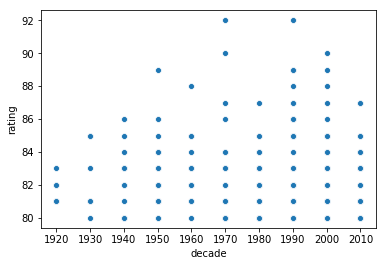

In [78]:
sns.scatterplot(x=imdb_df['decade'], y=imdb_df['rating'])

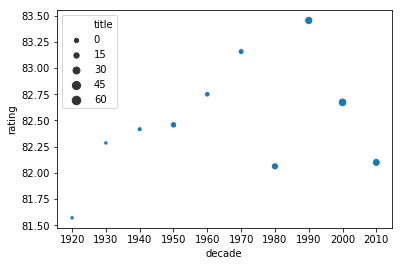

In [79]:
sns.scatterplot(x=decade_df['decade'], y=decade_df['rating'], size=decade_df['title'])

### OLD CODE

In [ ]:
#This works. Why does this work?
#This works.
#Stackoverflow Links:
#https://stackoverflow.com/questions/36076052/beautifulsoup-find-all-on-bs4-element-resultset-object-or-list
#https://stackoverflow.com/questions/16121001/suggestions-on-get-text-in-beautifulsoup

years_list = []
for yr in years:
    year = yr.get_text()
    years_list.append(year)

In [ ]:
cleaned_years_list = []
for el in years_list:
    el = re.sub('\W', '', el)
    cleaned_years_list.append(el)
    
cleaned_ratings_list = []
for el in ratings_list:
    el = re.sub('\W', '', el)
    cleaned_ratings_list.append(el)